In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 🔹 Data Exploration (Pandas + Visualization)

1. Load the dataset and display the first 10 rows.
2. Show summary statistics (mean, median, min, max) of `Age` and `Income`.
3. Count how many customers purchased vs. didn’t purchase.
4. Plot a histogram of `Spend_Score`.
5. Which city has the highest average income?

---

### 🔹 Data Preprocessing

6. Encode the categorical variable `Gender` into numeric form (Male = 0, Female = 1).
7. One-hot encode the `City` column.
8. Normalize/scale the `Income` column using StandardScaler.
9. Split the dataset into **train (80%) and test (20%)** sets.

---

### 🔹 Machine Learning (Scikit-learn)

10. Train a **Logistic Regression** model to predict `Purchased` using all features.
11. Evaluate the model with **accuracy score** on the test set.
12. Create a **confusion matrix** for the predictions.
13. Try a **Decision Tree Classifier** and compare accuracy with Logistic Regression.
14. Use **cross-validation** to check model performance.



In [62]:
df=pd.read_csv('/GoogleCollab_Scikit_Practice.csv.csv')

**Load the dataset and display the first 10 rows**

In [63]:
df.head(10)

,Age,Income,Gender,Spend_Score,Education,City,Purchased
0,56,21920,Male,54,Bachelors,Chennai,1
1,69,126121,Female,43,Bachelors,Chennai,0
2,46,97219,Female,42,PhD,Bangalore,0
3,32,96872,Female,81,PhD,Delhi,0
4,60,101132,Female,22,Bachelors,Mumbai,0
5,25,22093,Male,68,PhD,Bangalore,0
6,38,32905,Female,19,PhD,Kolkata,0
7,56,141759,Female,66,Masters,Mumbai,1
8,36,44351,Male,39,PhD,Kolkata,0
9,40,50981,Male,73,Masters,Bangalore,1


**How Many Samples are there in DataSet?**

In [64]:
df.shape

(5000, 7)

In [65]:
df.columns

Index(['Age', 'Income', 'Gender', 'Spend_Score', 'Education', 'City',
       'Purchased'],
      dtype='object')

**Show summary statistics (mean, median, min, max) of Age and Income**

In [66]:
df[['Age','Income']].describe()


,Age,Income
count,5000.000000,5000.000000
mean,43.584600,84632.847400
std,14.919094,37591.056659
min,18.000000,20060.000000
25%,31.000000,51618.250000
50%,43.000000,85510.500000
75%,56.000000,117301.000000
max,69.000000,149974.000000


**Count how many customers purchased vs. didn’t purchase**

In [67]:
purchased=df[df['Purchased']==1]['Purchased'].count()
not_purchased=df[df['Purchased']==0]['Purchased'].count()
print("Count of Customers who Purchased: ",purchased)
print("Count of Customers who didn't Purchased: ",not_purchased)

Count of Customers who Purchased:  2112
Count of Customers who didn't Purchased:  2888


**Plot a histogram of Spend_Score**


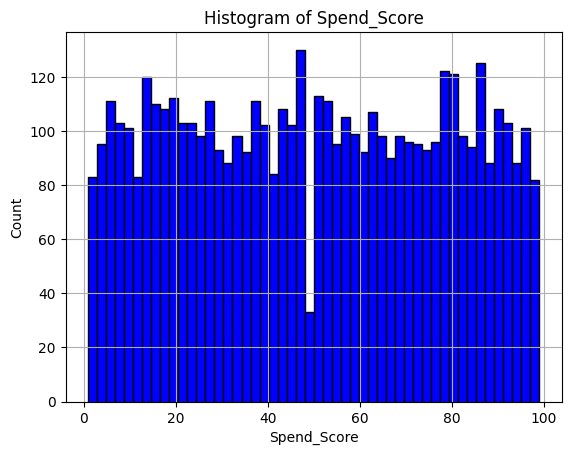

In [68]:
df['Spend_Score'].hist(bins=50,color='Blue',edgecolor='Black')
plt.xlabel('Spend_Score')
plt.ylabel('Count')
plt.title('Histogram of Spend_Score')
plt.show()

**Which city has the highest average income?**

In [69]:
highest_avg_income=df.groupby('City')['Income'].mean().idxmax()
print("City with Highest Average Income: ",highest_avg_income)

City with Highest Average Income:  Delhi


**Encode the categorical variable Gender into numeric form (Male = 0, Female = 1)**

In [70]:
gender_mapping={'Male':0, "Female":1}
df['Gender']=df['Gender'].map(gender_mapping)
df.head()

,Age,Income,Gender,Spend_Score,Education,City,Purchased
0,56,21920,0,54,Bachelors,Chennai,1
1,69,126121,1,43,Bachelors,Chennai,0
2,46,97219,1,42,PhD,Bangalore,0
3,32,96872,1,81,PhD,Delhi,0
4,60,101132,1,22,Bachelors,Mumbai,0


**One-hot encode the City column**

In [71]:
one_hot_encoded=pd.get_dummies(df,columns=['City'],prefix='Color')
one_hot_encoded.head(10)

,Age,Income,Gender,Spend_Score,Education,Purchased,Color_Bangalore,Color_Chennai,Color_Delhi,Color_Kolkata,Color_Mumbai
0,56,21920,0,54,Bachelors,1,False,True,False,False,False
1,69,126121,1,43,Bachelors,0,False,True,False,False,False
2,46,97219,1,42,PhD,0,True,False,False,False,False
3,32,96872,1,81,PhD,0,False,False,True,False,False
4,60,101132,1,22,Bachelors,0,False,False,False,False,True
5,25,22093,0,68,PhD,0,True,False,False,False,False
6,38,32905,1,19,PhD,0,False,False,False,True,False
7,56,141759,1,66,Masters,1,False,False,False,False,True
8,36,44351,0,39,PhD,0,False,False,False,True,False
9,40,50981,0,73,Masters,1,True,False,False,False,False


**Normalize/scale the Income column using StandardScaler.**

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Income']=scaler.fit_transform(df[['Income']])
df.head(10)

,Age,Income,Gender,Spend_Score,Education,City,Purchased
0,56,-1.668459,0,54,Bachelors,Chennai,1
1,69,1.103781,1,43,Bachelors,Chennai,0
2,46,0.334851,1,42,PhD,Bangalore,0
3,32,0.325619,1,81,PhD,Delhi,0
4,60,0.438956,1,22,Bachelors,Mumbai,0
5,25,-1.663856,0,68,PhD,Bangalore,0
6,38,-1.376206,1,19,PhD,Kolkata,0
7,56,1.519826,1,66,Masters,Mumbai,1
8,36,-1.071688,0,39,PhD,Kolkata,0
9,40,-0.895298,0,73,Masters,Bangalore,1


**Split the dataset into train (80%) and test (20%) sets**

In [73]:
from sklearn.model_selection import train_test_split
# Dropping 'Education' and 'City' before splitting
X=df[['Age','Income','Spend_Score']]
y=df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Train a Logistic Regression model to predict Purchased using all features:**

In [75]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred_log=model.predict(X_test)

log_acc=accuracy_score(y_test,y_pred_log)
print("Accuracy Score:",log_acc)
print("Predicted Labels",y_pred_log)

Accuracy Score: 0.579
Predicted Labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

**Create a confusion matrix for the predictions**

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
confusion=confusion_matrix(y_test,y_pred_log)
acuuracy=accuracy_score(y_test,y_pred_log)
precision=precision_score(y_test,y_pred_log)
recall=recall_score(y_test,y_pred_log)
f1=f1_score(y_test,y_pred_log)
print("Confusion Matrix:\n")
print(confusion)
print("\nAccuracy Score:",acuuracy)
print("Precision Score:",precision)
print("Recall Score:",recall)
print("F1 Score:",f1)

Confusion Matrix:

[[579   0]
 [421   0]]

Accuracy Score: 0.579
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Try a Decision Tree Classifier and compare accuracy with Logistic Regression**

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=4,random_state=42)
dt_model.fit(X_train,y_train)

y_pred_dt=dt_model.predict(X_test)

dt_acc=accuracy_score(y_test,y_pred_dt)

print("Logistic Accuracy: ",log_acc)
print("Decision Tree Accuracy Score: ",dt_acc)

print("Logistic Regression Reports:\n",classification_report(y_test,y_pred_log))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred_log))

print("\nDecision Tree Reports:\n",classification_report(y_test,y_pred_dt))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))


Logistic Accuracy:  0.579
Decision Tree Accuracy Score:  0.571
Logistic Regression Reports:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73       579
           1       0.00      0.00      0.00       421

    accuracy                           0.58      1000
   macro avg       0.29      0.50      0.37      1000
weighted avg       0.34      0.58      0.42      1000


Confusion Matrix:
 [[579   0]
 [421   0]]

Decision Tree Reports:
               precision    recall  f1-score   support

           0       0.58      0.98      0.73       579
           1       0.25      0.01      0.02       421

    accuracy                           0.57      1000
   macro avg       0.41      0.49      0.37      1000
weighted avg       0.44      0.57      0.43      1000


Confusion Matrix:
 [[567  12]
 [417   4]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Visualize the Decision Tree**

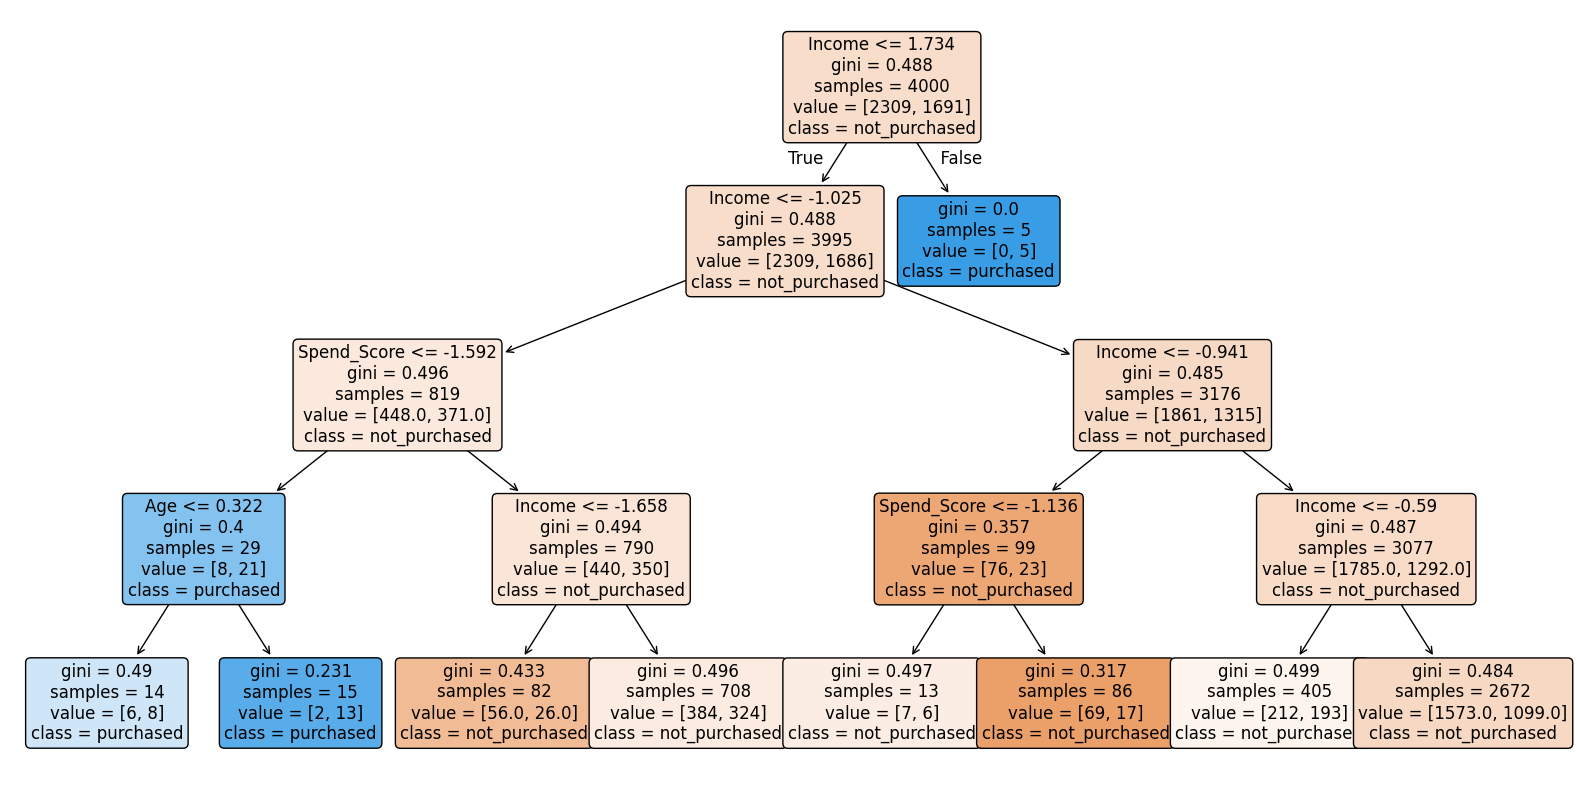

In [82]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model,rounded=True,fontsize=12,filled=True,feature_names=X.columns,class_names=['not_purchased','purchased'])
plt.show()

**Use cross-validation to check model performance**